## Week 5-6

## Name         : Ayachit Madhukar  
## Course       : DSC540 
## Instructor  : Catherine Williams
## Date           : 15 Apr 2021

# Activity 7 Reading Tabular Data from a Web Page and Creating DataFrames


In [10]:
## Setting up environemnt
import os
os.getcwd() 
import sys
sys.path.append('../data')

### Task 1  
Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure


In [11]:
## Importing required libraries/modules
from bs4 import BeautifulSoup
import pandas as pd

### Task 2 
Read the page using bs4



In [12]:
##reasding html file
fd = open("data/List of countries by GDP (nominal) - Wikipedia.htm", "r")
soup = BeautifulSoup(fd)
fd.close()

### Task 3 Find the table structure you will need to deal with (how many tables there are?)


In [13]:
## Reading all tables in the html 
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


### Task 4
Find the right table using bs4


In [14]:
## reading a specific table based on css class
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


### Task 5
Separate the source names and their corresponding data


In [18]:
## Iterating in TR and TD
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [19]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [20]:
## Iterating in the table
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [21]:
## Length of table
len(data_tables)

3

### Task 6
Get the source names from the list of sources you have created


In [22]:
## finding anchor tag
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


### Task 7
Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that


In [25]:
## Finding headers
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [26]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [27]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [28]:
## creating dataframe 
df1 = pd.DataFrame(data_rows1, columns=header1)

In [29]:
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


### Task 8 
Repeat the last task for the other two data sources


In [18]:
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [19]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [20]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [21]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [22]:
df2 = pd.DataFrame(data_rows2, columns=header2)

In [23]:
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [24]:
# Now for the third one
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [25]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [26]:
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [27]:
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


# Activity 8: Handling Outliers and Missing Data



In [30]:
## loading required libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Task 1
Read the visit_data.csv file.


In [31]:
## readng .csv file and creating dataframe
df = pd.read_csv("data/visit_data.csv")

In [32]:
df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


### Task 2
Check for duplicates.


In [39]:
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


### Task 3
Check if any essential column contains NaN.


In [41]:
# Notice that we have different ways to format boolean values for the % operator
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


### Task 4
Get rid of the outliers

In [42]:
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

### Task 5
Report the size difference.


In [43]:
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


### Task 6
Create a box plot to check for outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb49dcecc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb49b2e7310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb49dcec8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb49b2e79d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb49b2e7d30>],
 'means': []}

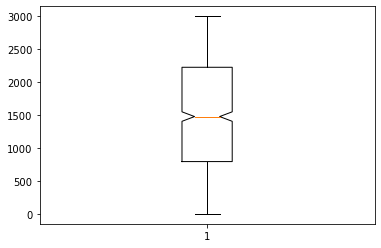

In [44]:
plt.boxplot(df.visit, notch=True)

### Task 7
Get rid of any outliers

In [45]:
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)] 

In [46]:
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


## SQL Lite database 

In [33]:
## loading library
import sqlite3
from sqlite3 import Error

In [3]:
## creating Databse file

database = r"Customer.db"
db = sqlite3.connect(database)

In [34]:
## Table creation script
sql_create_tasks_table = """CREATE TABLE IF NOT EXISTS Customer (
                                    id integer PRIMARY KEY,
                                    Name text NOT NULL,
                                    Address text NOT NULL,
                                    City text NOT NULL,
                                    State text NOT NULL,
                                    Zip integer NOT NULL,
                                    Phone_Number integer NOT NULL
                                );"""

In [35]:
## Establishing DB Connection 
conn = None
try:
    conn = sqlite3.connect(database)
        
except Error as e:
    print(e)


In [36]:
## execuring Table creation script 
try:
    c = conn.cursor()
    c.execute(sql_create_tasks_table)
    c.close()
except Error as e:
    print(e)

In [8]:
## inserting 10 records 
cur = conn.cursor()
cur.execute('INSERT INTO Customer values (1,"John","123 Main St","Edison","NJ",08820,1234567890) ')
cur.execute('INSERT INTO Customer values (2,"Mike","123 Main St","Austin","Tx",08372,1234567890) ')
cur.execute('INSERT INTO Customer values (3,"Kathy","123 Main St","Boone","NC",08372,1234567890) ')
cur.execute('INSERT INTO Customer values (4,"Rita","123 Main St","Edison","VA",08372,1234567890) ')
cur.execute('INSERT INTO Customer values (5,"Sam","123 Main St","Boston","MA",08372,1234567890) ')
cur.execute('INSERT INTO Customer values (6,"Mady","123 Main St","Largo","MD",08372,1234567890) ')
cur.execute('INSERT INTO Customer values (7,"Phil","123 Main St","Iselin","NJ",08372,1234567890) ')
cur.execute('INSERT INTO Customer values (8,"Andrew","123 Main St","Brunswick","NJ",08372,1234567890) ')
cur.execute('INSERT INTO Customer values (9,"Nick","123 Main St","Edison","NJ",08837,1234567890) ')
cur.execute('INSERT INTO Customer values (10,"Joe","123 Main St","Edison","NJ",08817,1234567890) ')
db.commit()
cur.close()

In [9]:
##  fetching and displaying inserted records
cur = conn.cursor()
cur.execute("select * from Customer")
cur.fetchall()

[(1, 'John', '123 Main St', 'Edison', 'NJ', 8820, 1234567890),
 (2, 'Mike', '123 Main St', 'Austin', 'Tx', 8372, 1234567890),
 (3, 'Kathy', '123 Main St', 'Boone', 'NC', 8372, 1234567890),
 (4, 'Rita', '123 Main St', 'Edison', 'VA', 8372, 1234567890),
 (5, 'Sam', '123 Main St', 'Boston', 'MA', 8372, 1234567890),
 (6, 'Mady', '123 Main St', 'Largo', 'MD', 8372, 1234567890),
 (7, 'Phil', '123 Main St', 'Iselin', 'NJ', 8372, 1234567890),
 (8, 'Andrew', '123 Main St', 'Brunswick', 'NJ', 8372, 1234567890),
 (9, 'Nick', '123 Main St', 'Edison', 'NJ', 8837, 1234567890),
 (10, 'Joe', '123 Main St', 'Edison', 'NJ', 8817, 1234567890)]